# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [25]:
import pandas as pd
import numpy as np

In [26]:
boston = pd.read_csv('../data/boston_data.csv')

In [27]:
boston.dtypes

crim       float64
zn         float64
indus      float64
chas       float64
nox        float64
rm         float64
age        float64
dis        float64
rad        float64
tax        float64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [28]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


In [29]:
# it seems that 'chas' column is just 0 and 1s. Let's check it

boston['chas'].value_counts()

0.0    376
1.0     28
Name: chas, dtype: int64

In [30]:
boston.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

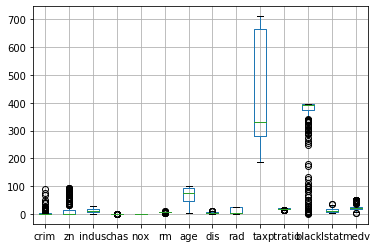

In [31]:
boston.boxplot()

In [32]:
# It seems there are many outliers. In order to drop them but keeping enough data, I
# will remove those that are bigger than Q75 + 3*IQR and lower than Q25 - 3*IQR

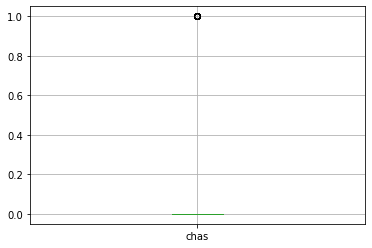

In [33]:
# checking 'chas' column
boston.boxplot(column = 'chas')

In [34]:
# Defining a function to get the edge values for the outliers.

def get_fences(x):
    """ Passing a Series, gives back upper fence and lower fence, calculated
    by percentile 75 + 3 * IQR and percentile 25 - 3 * IQR
    """
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1
    upper_fence = q3 + 3 * iqr
    lower_fence = q1 - 3 * iqr
    
    return upper_fence, lower_fence

In [36]:
# applying the function to all the columns to drop the outliers, except 'chas' column
# which is just 0 and 1

boston_reduced = boston
for column in boston.columns:
    if column != 'chas':
        uf_column, lf_column = get_fences(boston_reduced[column])
        boston_reduced = boston_reduced.drop(boston_reduced.loc[boston_reduced[column]>uf_column].index)
        boston_reduced = boston_reduced.drop(boston_reduced.loc[boston_reduced[column]<lf_column].index)
    else:
        pass

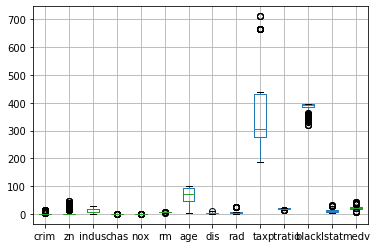

In [38]:
# checking the new dataframe plots.
boston_reduced.boxplot()

In [39]:
# there are still some outliers, but not as many as before.

### Next, we want to explore the data. Pick several variables you think will be most correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

In [40]:
# I'll check the correlation table to find
boston_reduced.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.244847,0.524088,-0.041324,0.585261,-0.141352,0.411350,-0.449759,0.858792,0.784430,0.327440,-0.199506,0.467740,-0.464949
zn,-0.244847,1.000000,-0.439960,-0.008276,-0.403214,0.332522,-0.388709,0.513852,-0.204382,-0.267627,-0.330288,0.145362,-0.337654,0.366928
indus,0.524088,-0.439960,1.000000,0.045352,0.695600,-0.363294,0.503518,-0.616429,0.511827,0.677605,0.282044,-0.380118,0.560642,-0.541918
chas,-0.041324,-0.008276,0.045352,1.000000,0.107138,0.002368,0.090643,-0.101841,-0.015174,-0.048785,-0.132135,-0.114611,0.047909,0.053961
nox,0.585261,-0.403214,0.695600,0.107138,1.000000,-0.264912,0.672084,-0.733464,0.550871,0.628324,0.052577,-0.363912,0.528525,-0.439272
rm,-0.141352,0.332522,-0.363294,0.002368,-0.264912,1.000000,-0.152538,0.175108,-0.072466,-0.187451,-0.176645,0.209903,-0.625474,0.735572
age,0.411350,-0.388709,0.503518,0.090643,0.672084,-0.152538,1.000000,-0.668262,0.338949,0.413064,0.114210,-0.209686,0.556127,-0.396617
dis,-0.449759,0.513852,-0.616429,-0.101841,-0.733464,0.175108,-0.668262,1.000000,-0.380029,-0.469239,-0.104390,0.255769,-0.433929,0.275328
rad,0.858792,-0.204382,0.511827,-0.015174,0.550871,-0.072466,0.338949,-0.380029,1.000000,0.883131,0.389622,-0.170610,0.351494,-0.365806
tax,0.784430,-0.267627,0.677605,-0.048785,0.628324,-0.187451,0.413064,-0.469239,0.883131,1.000000,0.388882,-0.274755,0.441354,-0.500801


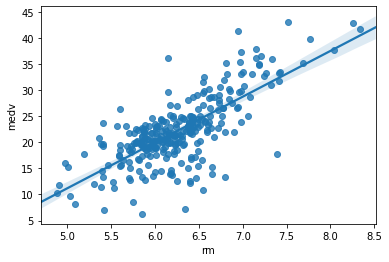

In [44]:
import seaborn as sns

sns.regplot('rm', 'medv', boston_reduced)

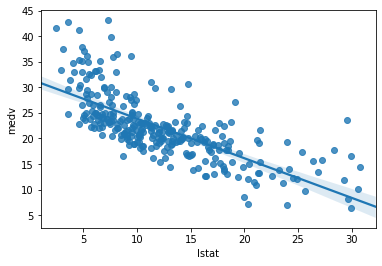

In [46]:
sns.regplot('lstat', 'medv', boston_reduced)

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [47]:
# These are the two most correlated variables to medv, the first one 'rm' with a positive
# correlation: the higher the rm value, the higher the medv value.
# And the second one 'lstat' with a negative correlation: the higher the lstat value, the
# lower medv value
# However, there are many values concentrated in a range and then we could say we still
# have some outliers.

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

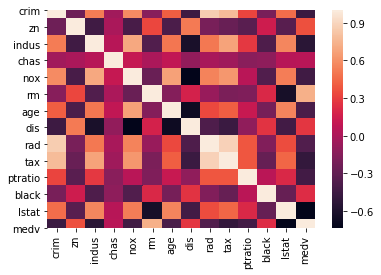

In [49]:
sns.heatmap(boston_reduced.corr())

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [60]:
print('Minimum price:', min(boston_reduced['medv']))
print('Maximum price:', max(boston_reduced['medv']))
print('Mean price:', boston_reduced['medv'].mean())
print('Median price:', boston_reduced['medv'].median())
print('Standard Deviation on price:', boston_reduced['medv'].std())

Minimum price: 6.3
Maximum price: 43.1
Mean price: 22.200675675675676
Median price: 21.7
Standard Deviation on price: 6.428121444452232


----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [ ]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    return r2_score(y_true, y_predict )

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [ ]:
# Your code here

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [ ]:
# Five separate RFR here with the given max depths

Now, plot the score for each tree on the training set and on the testing set.

In [ ]:
# Produce a plot with the score for the testing and training for the different max depths

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
# Your response here

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [ ]:
# Your response here

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [ ]:
# Your response here

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# Your response here